# Heart Attack Analysis & Prediction

## What will you learn from this project?
* EDA
* Missing Value Analysis
* Categoric and Numeric Features
* Standardization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learning Model 

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood. 
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle. 
* Coronary artery disease (CAD) is the main cause of heart attack.

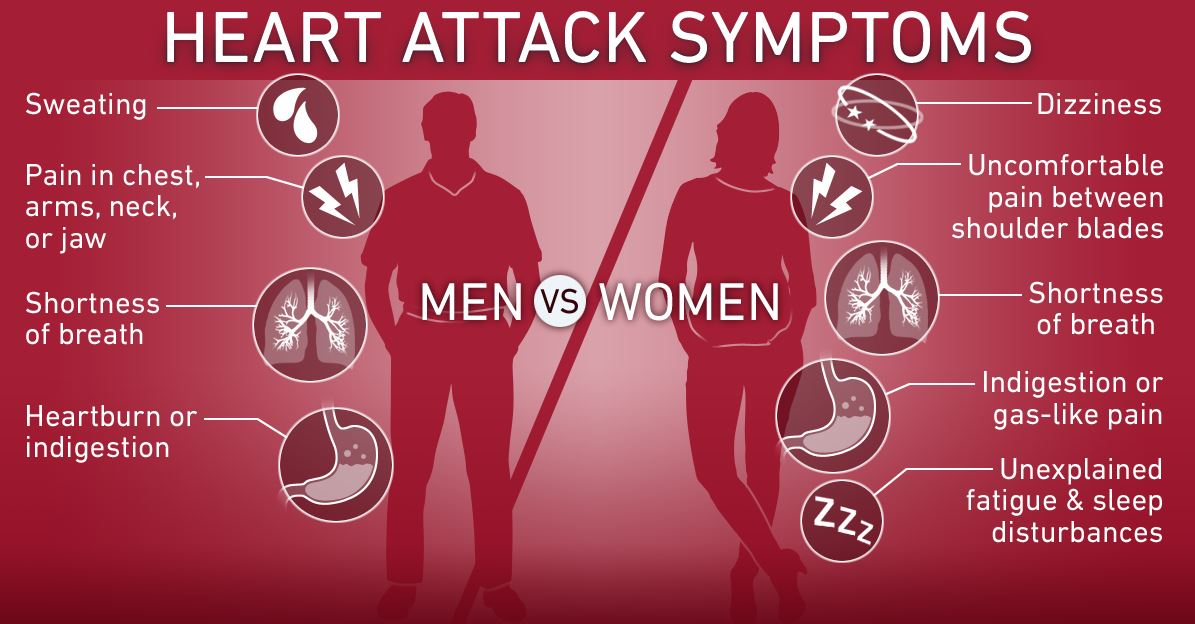

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyse Data](#3)
1. [Missing Value Analysis](#4)
1. [Unique Value Analysis](#5)
1. [Categorical Feature Analysis](#6)
1. [Numeric Feature Analysis](#7)
1. [Standardization](#8)
1. [Box Plot Analysis](#9)
1. [Swarm Plot Analysis](#10)
1. [Cat Plot Analysis](#11)
1. [Correlation Analysis](#12)
1. [Outlier Detection](#13)
1. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression
    1. Logistic Regression Hyperparameter Tuning
1. [Conclusion](#15)

<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

<a id="3"></a>
## Read and Analyse Data
* In this section, we read heart.csv

In [ ]:
# read data 
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [ ]:
df.head()

In [ ]:
# describe basic statistics of data
df.describe()

In [ ]:
# information about data frame
df.info()

<a id="4"></a>
## Missing Value Analysis

In [ ]:
# missing value
df.isnull().sum()

<a id="5"></a>
## Unique Value Analysis

In [ ]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

<a id="6"></a>
## Categorical Feature Analysis

In [ ]:
categorical_list = ["sex", "cp","fbs","restecg","exng","slp","caa","thall","output"]

In [ ]:
df_categoric = df.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric, hue = "output")
    plt.title(i)

<a id="7"></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak","output"]

In [ ]:
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

<a id="8"></a>
## Standardization

In [ ]:
scaler = StandardScaler()
scaler

In [ ]:
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])

In [ ]:
scaled_array 

In [ ]:
# pd.DataFrame(scaled_array).describe()

<a id="9"></a>
## Box Plot Analysis

In [ ]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_list[:-1])
df_dummy.head()

In [ ]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis = 1)
df_dummy.head()

In [ ]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

In [ ]:
# box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="10"></a>
## Swarm Plot Analysis

In [ ]:
# swarm plot
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id="11"></a>
## Cat Plot Analysis

In [ ]:
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

<a id="12"></a>
## Correlation Analysis

In [ ]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can disrupt ML process.
* 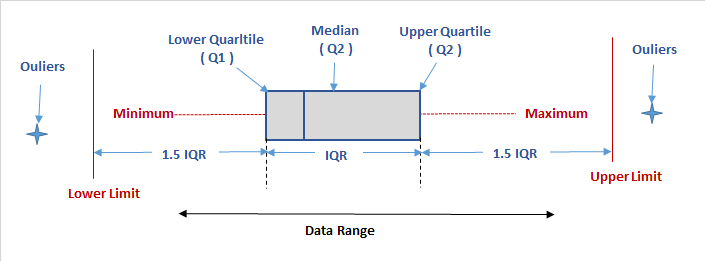

In [ ]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

In [ ]:
df.describe()

In [ ]:
# outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

<a id="14"></a>
## Modelling

In [ ]:
df1 = df.copy()

### Encoding Categorical Columns
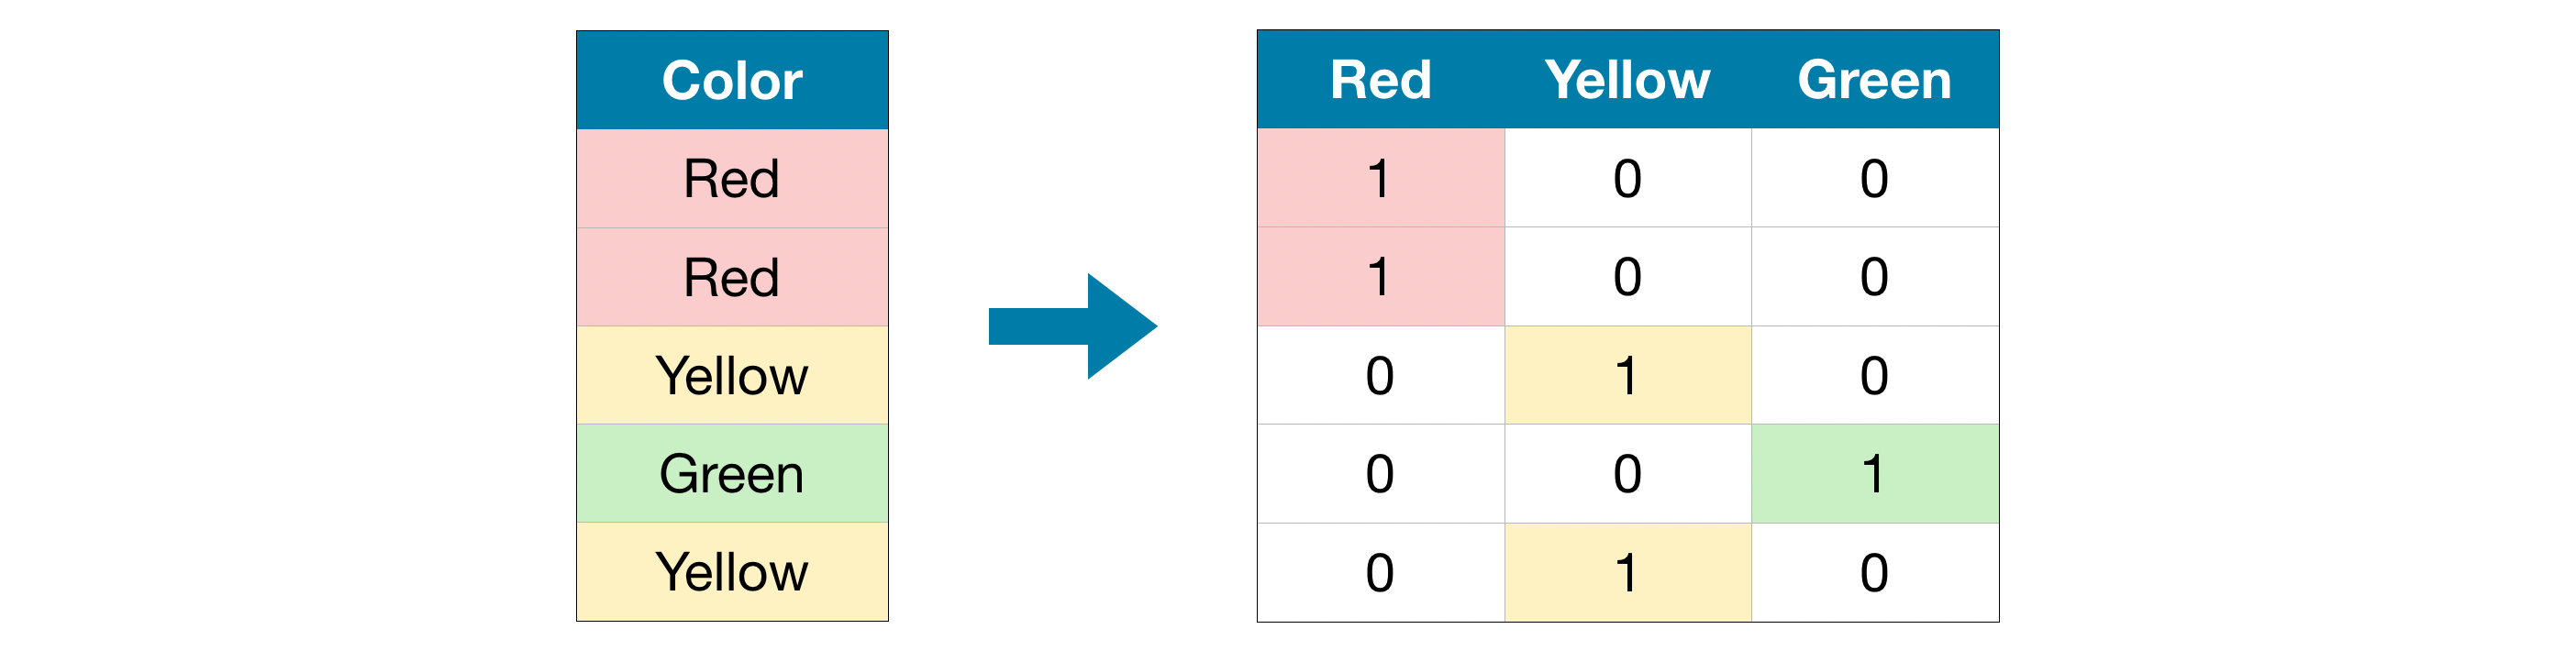

In [ ]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

In [ ]:
# 
X = df1.drop(["output"], axis = 1)
y = df1[["output"]]

### Scaling

In [ ]:
scaler = StandardScaler()
scaler

In [ ]:
X[numeric_list[:-1]] = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

### Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

### Logistic Regression 

In [ ]:
logreg = LogisticRegression()
logreg

In [ ]:
# fitting = training
logreg.fit(X_train, y_train)

In [ ]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

In [ ]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

In [ ]:
#dummy_ = pd.DataFrame(y_pred_prob)
#dummy_["y_pred"] = y_pred
#dummy_.head()

In [ ]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

##### ROC Curve 
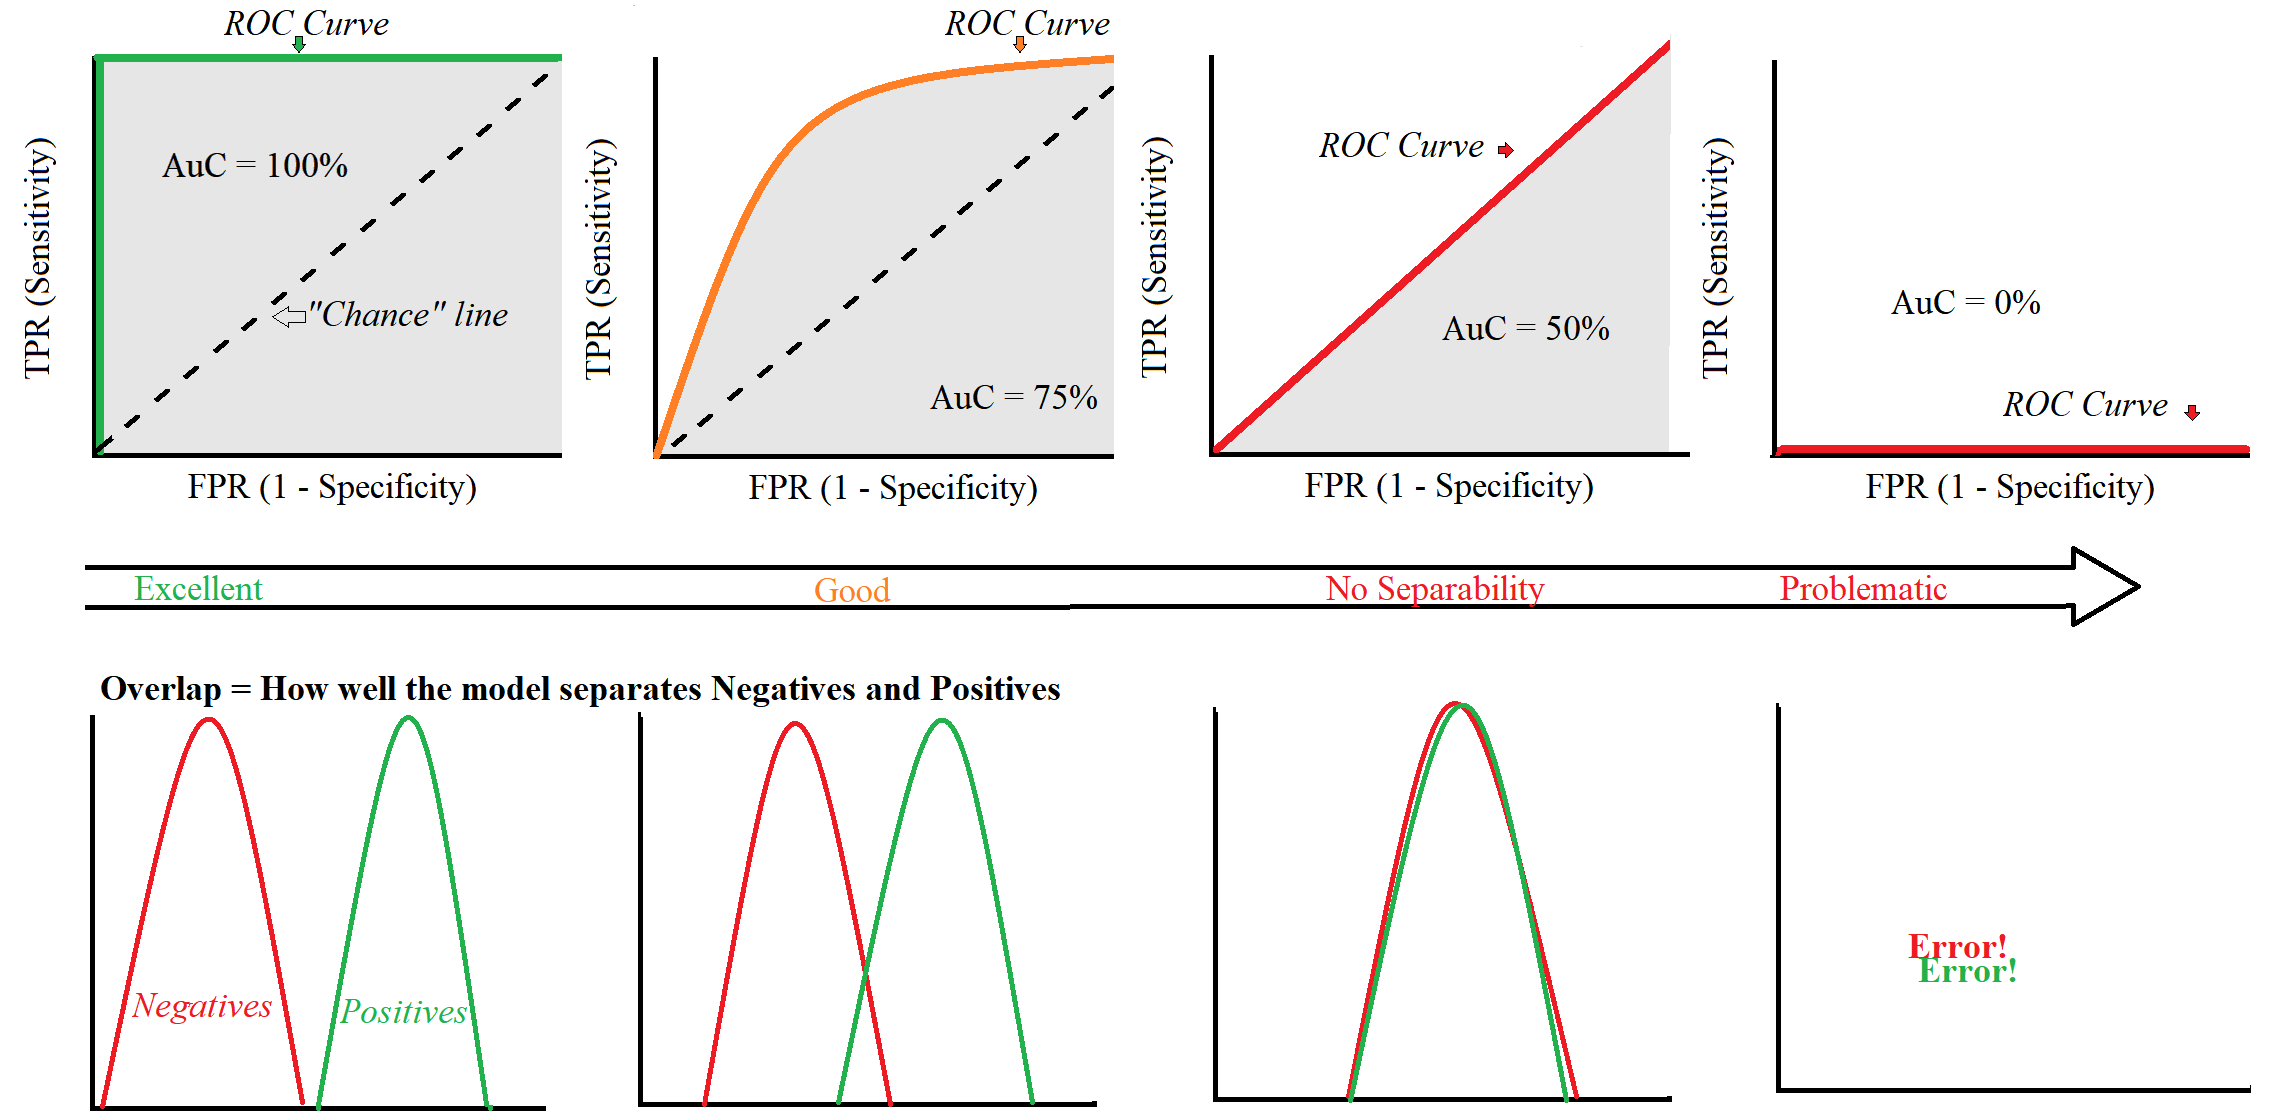

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [ ]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Logistic Regression Hyperparameter Tuning

In [ ]:
lr = LogisticRegression()
lr

In [ ]:
penalty = ["l1", "l2"]

parameters = {"penalty":penalty}

In [ ]:
lr_searcher = GridSearchCV(lr, parameters)

In [ ]:
lr_searcher.fit(X_train, y_train)

In [ ]:
print("Best parameters: ",lr_searcher.best_params_)

In [ ]:
y_pred = lr_searcher.predict(X_test)

In [ ]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

<a id="15"></a>
## Conclusion
* Lets make a practise now!
* You can make different analyzes to reinforce what you have learned.